In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import filters

In [25]:
def show(img):
    plt.imshow(img, cmap="gray")
    plt.show()

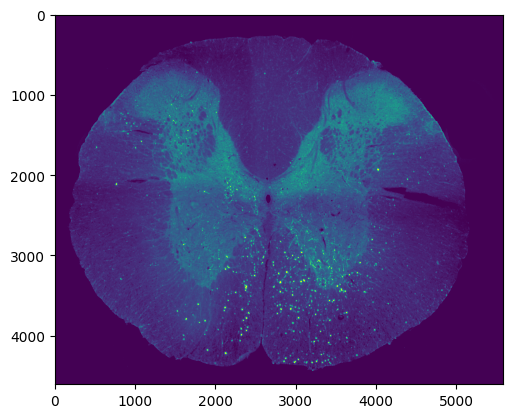

In [26]:
im = plt.imread("Representatives/C2-BJZ5.tif")[:,:,0]
sh = im.shape
plt.imshow(im)
plt.show()

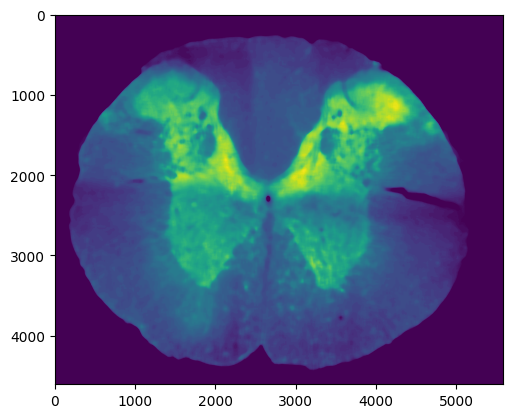

In [27]:
median = cv2.medianBlur(im,65)
plt.imshow(median)

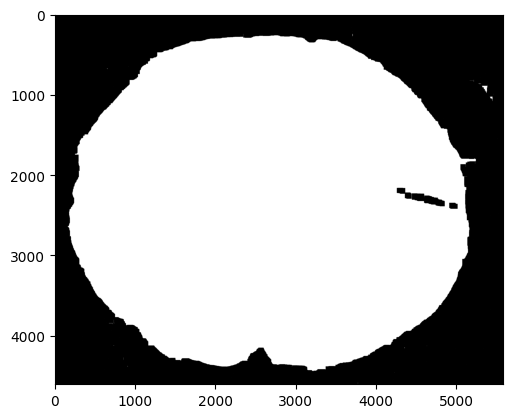

In [28]:
iniital_mask = im > 10
kernel2 = np.ones((60, 60), np.uint8)
iniital_mask = cv2.morphologyEx(iniital_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel2)
show(iniital_mask)

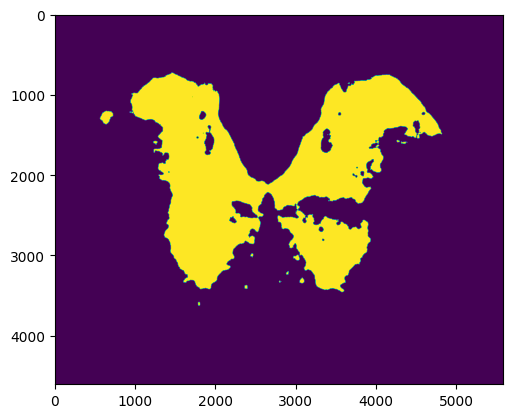

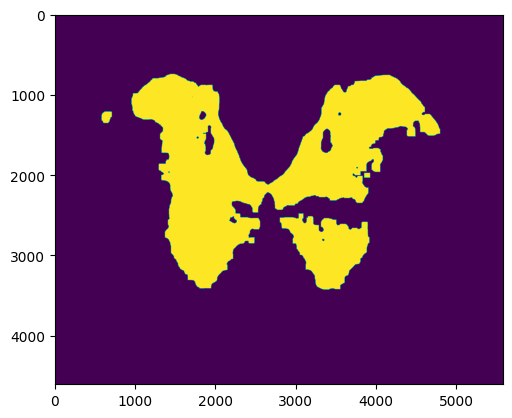

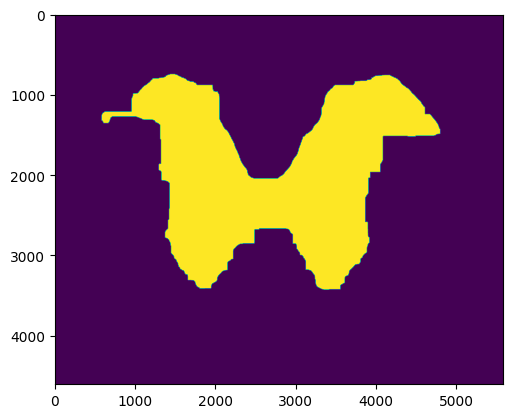

In [29]:
separated = median*iniital_mask
separated = separated[separated > 10]
th = filters.threshold_otsu(separated.flatten())

separated = median*iniital_mask
separated = separated>th

plt.imshow(separated)
plt.show()

kernel2 = np.ones((60, 60), np.uint8)
segmented_open = cv2.morphologyEx(separated.astype(np.uint8), cv2.MORPH_OPEN, kernel2)
plt.imshow(segmented_open)
plt.show()

kernel = np.ones((300,300),np.uint8)
segmented_closed = cv2.morphologyEx(segmented_open.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.imshow(segmented_closed)
plt.show()

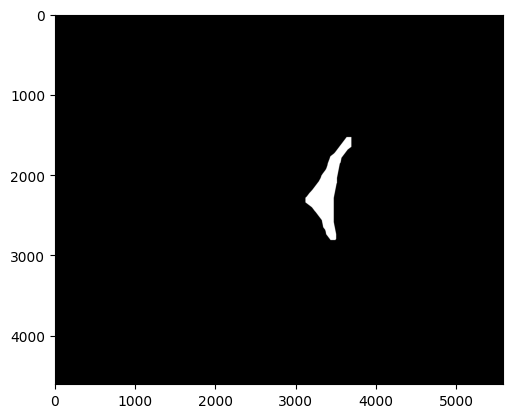

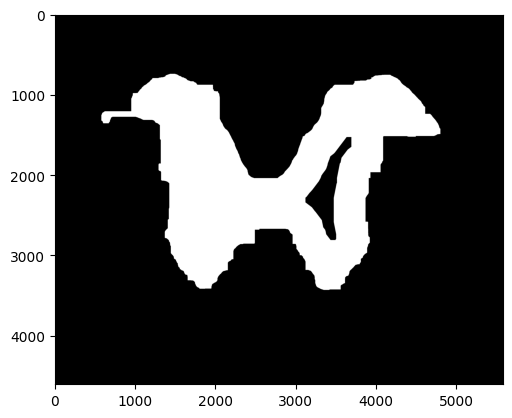

In [55]:
# noise removal
seg = segmented_closed*iniital_mask
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(seg,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
kernel2 = np.ones((30,30),np.uint8)
sure_fg = cv2.morphologyEx(sure_fg,cv2.MORPH_OPEN,kernel2, iterations = 2)

ret, markers = cv2.connectedComponents(sure_fg)

sure_fg_1 = markers==1
show(sure_fg_1)

unknown_1 = sure_fg_1 - sure_bg
show(unknown_1)

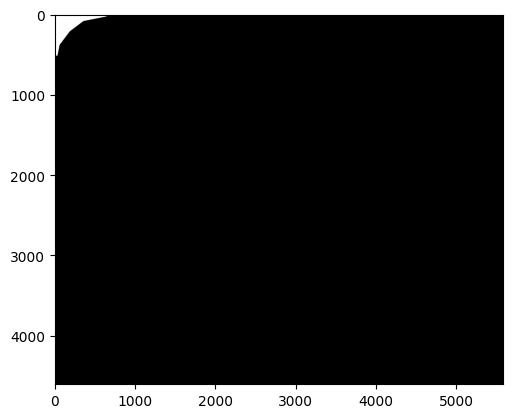

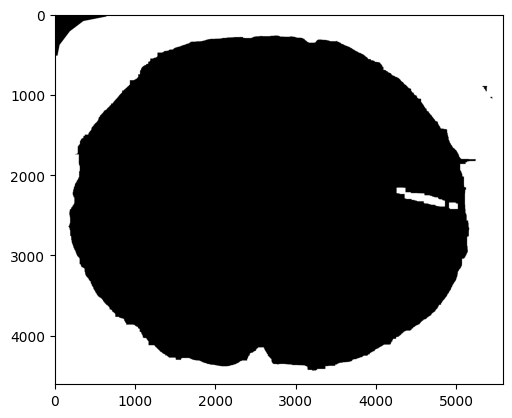

In [31]:
# noise removal
seg = 1-iniital_mask
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(seg.astype(np.uint8),cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
kernel2 = np.ones((30,30),np.uint8)
sure_fg = cv2.morphologyEx(sure_fg,cv2.MORPH_OPEN,kernel2, iterations = 2)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1

sure_fg_0 = markers==2
show(sure_fg_0)

unknown_0 = sure_fg_0 - sure_bg
show(unknown_0)

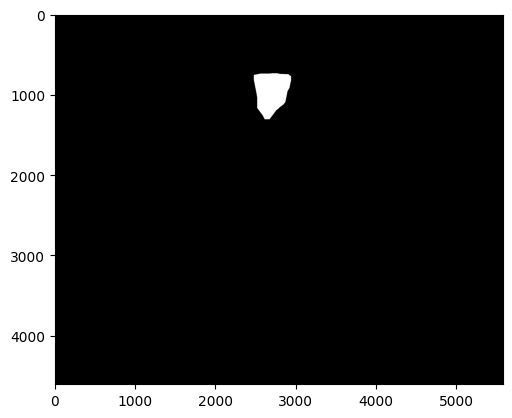

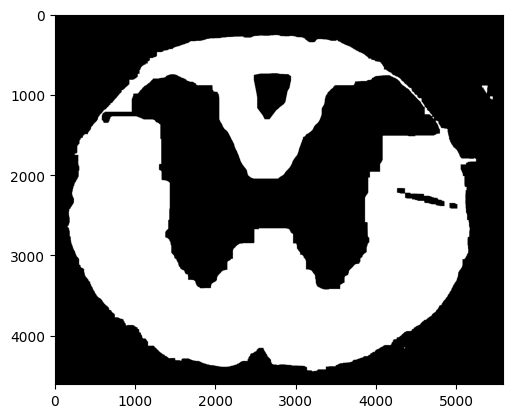

In [54]:
# noise removal
seg = (1-segmented_closed)*iniital_mask
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(seg.astype(np.uint8),cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
kernel2 = np.ones((30,30),np.uint8)
sure_fg = cv2.morphologyEx(sure_fg,cv2.MORPH_OPEN,kernel2, iterations = 2)

unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

sure_fg_2 = markers==1
show(sure_fg_2)

unknown_2 = sure_fg_2 - sure_bg
show(unknown_2)

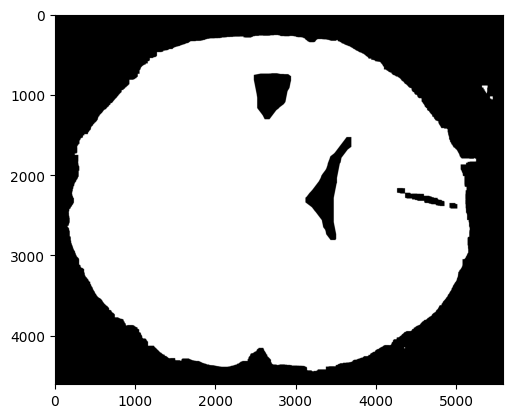

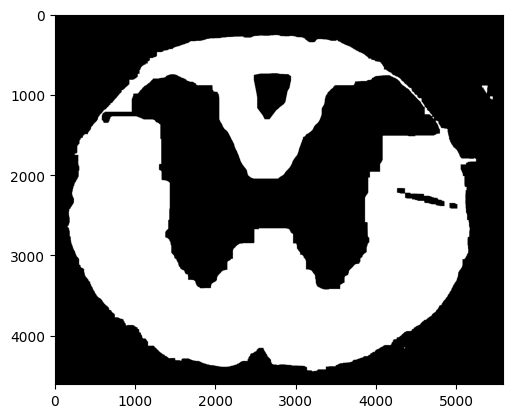

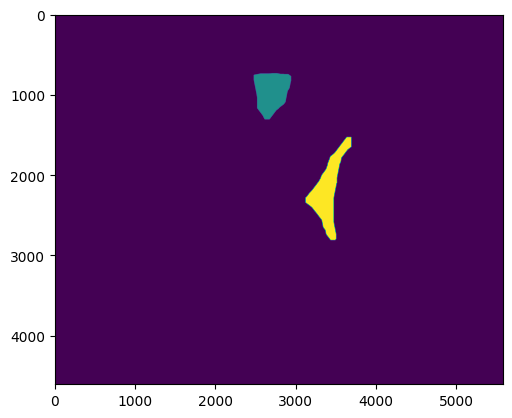

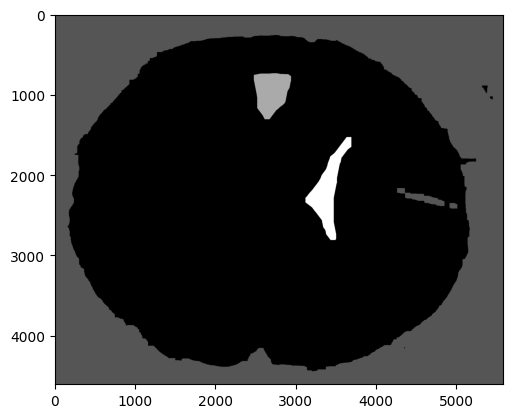

In [86]:
sure_fg = sure_fg_1 + sure_fg_2
unknown = unknown_1 + unknown_2
unknown[unknown==254] = 255
show(unknown)
show(unknown_2)
ret, markers = cv2.connectedComponents(sure_fg.astype(np.uint8))
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.imshow(markers)
plt.show()
markers[unknown==255] = 0
show(markers)

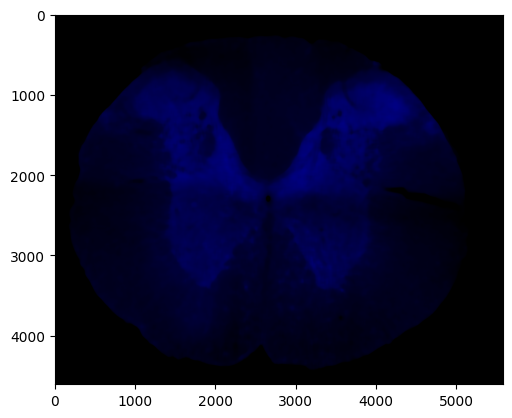

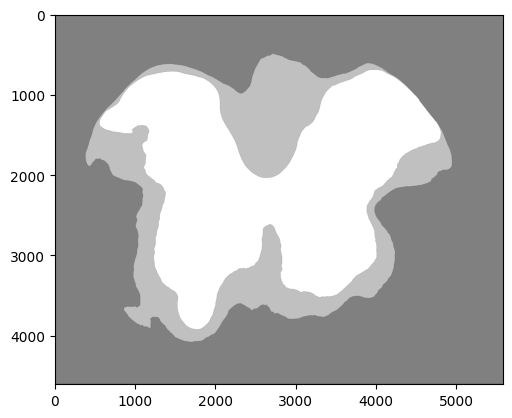

In [90]:
im = cv2.imread("Representatives/C2-BJZ5.tif")
median = cv2.medianBlur(im,65)
show(median)
markers = cv2.watershed(im, markers)
show(markers)

In [68]:

img = cv2.imread('water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

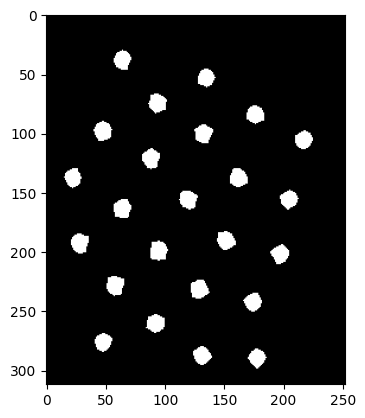

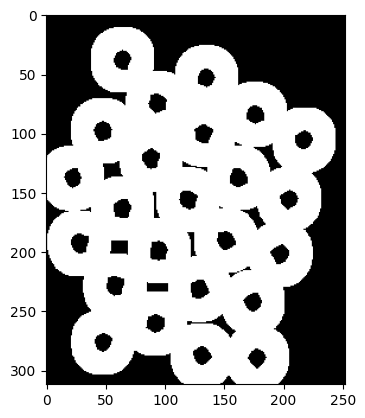

In [69]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
show(sure_fg)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
show(unknown)

In [72]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

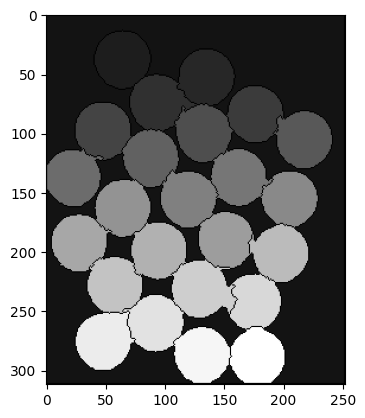

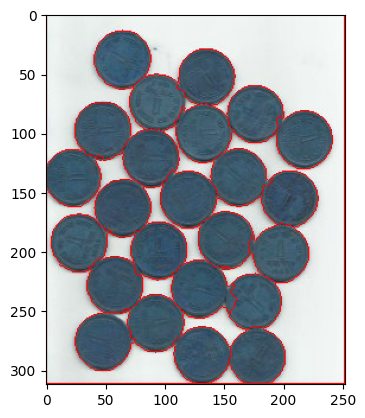

In [74]:
markers = cv2.watershed(img,markers)
show(markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)

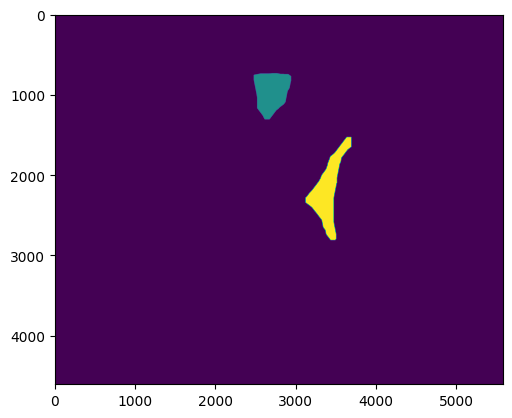

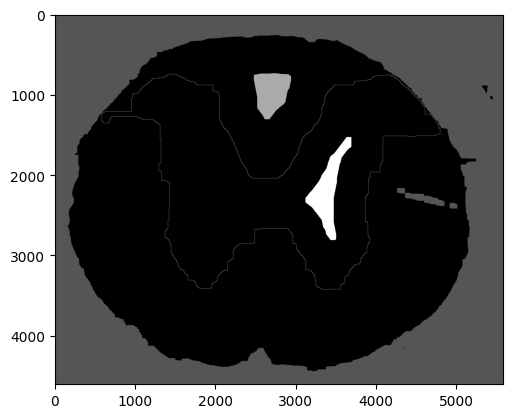

In [76]:
sure_fg = sure_fg_1 + sure_fg_2
unknown = unknown_1 + unknown_2
ret, markers = cv2.connectedComponents(sure_fg.astype(np.uint8))
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.imshow(markers)
plt.show()
markers[unknown==255] = 0
show(markers)